In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model
import joblib

In [2]:
csv_files = glob.glob("/content/drive/MyDrive/Datos_TFG_HP/Datos_finales/Multiclase/*.csv")


df_list = [pd.read_csv(f) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

print(f"Total de muestras: {len(df)}")
print("Columnas:", df.columns)

Total de muestras: 12100
Columnas: Index(['event_id', 'clase', 'game_clock_1', 'shot_clock_1', 'x_loc_ball_1',
       'y_loc_ball_1', 'z_loc_ball_1', 'x_loc_player_1_1', 'y_loc_player_1_1',
       'x_loc_player_2_1',
       ...
       'x_loc_player_6_40', 'y_loc_player_6_40', 'x_loc_player_7_40',
       'y_loc_player_7_40', 'x_loc_player_8_40', 'y_loc_player_8_40',
       'x_loc_player_9_40', 'y_loc_player_9_40', 'x_loc_player_10_40',
       'y_loc_player_10_40'],
      dtype='object', length=1002)


In [3]:
y = df["clase"].values

X = df.drop(columns=["event_id", "clase"]).values

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (12100, 1000)
Forma de y: (12100,)


In [4]:
y_cat = to_categorical(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [5]:
pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(y_train.shape[1], activation='softmax')
])



model.compile(optimizer=AdamW(learning_rate=1e-3, weight_decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stop, lr_scheduler],
                    verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
133/133 - 15s - 115ms/step - accuracy: 0.4717 - loss: 1.2261 - val_accuracy: 0.6044 - val_loss: 0.9755 - learning_rate: 1.0000e-03
Epoch 2/100
133/133 - 2s - 14ms/step - accuracy: 0.6102 - loss: 0.9378 - val_accuracy: 0.6567 - val_loss: 0.8585 - learning_rate: 1.0000e-03
Epoch 3/100
133/133 - 3s - 23ms/step - accuracy: 0.6440 - loss: 0.8552 - val_accuracy: 0.6810 - val_loss: 0.8016 - learning_rate: 1.0000e-03
Epoch 4/100
133/133 - 2s - 16ms/step - accuracy: 0.6669 - loss: 0.8021 - val_accuracy: 0.6975 - val_loss: 0.7575 - learning_rate: 1.0000e-03
Epoch 5/100
133/133 - 2s - 12ms/step - accuracy: 0.6872 - loss: 0.7667 - val_accuracy: 0.7185 - val_loss: 0.7198 - learning_rate: 1.0000e-03
Epoch 6/100
133/133 - 2s - 17ms/step - accuracy: 0.6986 - loss: 0.7361 - val_accuracy: 0.7278 - val_loss: 0.7020 - learning_rate: 1.0000e-03
Epoch 7/100
133/133 - 1s - 10ms/step - accuracy: 0.7158 - loss: 0.6976 - val_accuracy: 0.7350 - val_loss: 0.6788 - learning_rate: 1.0000e-03
Epoch 8/100

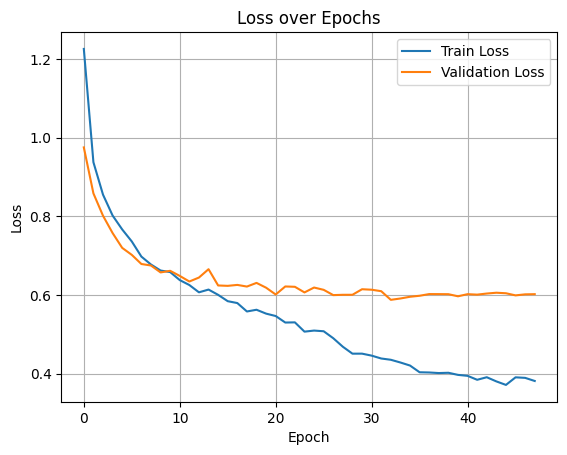

In [7]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {acc:.4f}")


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


from sklearn.metrics import confusion_matrix, classification_report
print("\nMatriz de confusión:")
print(confusion_matrix(y_true_classes, y_pred_classes))


print("\nReporte de clasificación:")
print(classification_report(y_true_classes, y_pred_classes))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.5153

Test accuracy: 0.7972
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Matriz de confusión:
[[179   3  20  26]
 [ 32 273  68   3]
 [ 61  87 917  14]
 [ 28  10  16  78]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       228
           1       0.73      0.73      0.73       376
           2       0.90      0.85      0.87      1079
           3       0.64      0.59      0.62       132

    accuracy                           0.80      1815
   macro avg       0.72      0.74      0.72      1815
weighted avg       0.81      0.80      0.80      1815

